# Energy Consumption Level Prediction
![Energy Consumption Level Prediction](Images/Energy.jpg)
## Objective:
<p align="justify">
Predict energy consumption levels combining IoT sensor measurements to weather data. KNN and Random Forest are compared and evaluated considering a wide range of metrics such as R.M.S.E., M.A.E., R squared and M.S.E. A principal componenet analysis (PCA) is carried out to reduce dimensionality and algorithms' learning curves are evaluated too. The research presents KNN as a valuable model for effective energy management and planning.
</p>

[Energy.csv](https://github.com/justgrossi/Portfolio/blob/main/3.Energy_Consumption_Prediction/energy.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Data exploration
def load_and_inspect_data(file_path):
    """Load the dataset and perform initial inspection"""
    print("=" * 60)
    print("LOADING AND INSPECTING DATA")
    print("=" * 60)
    
    # Load the data
    df = pd.read_csv(file_path)
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumn names and types:")
    print(df.dtypes)
    
    print(f"\nMissing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    print(f"\nDuplicated values:")
    print(df.duplicated().sum())
    display(df.head())
    return df

In [3]:
file_path='energy.csv'
df=load_and_inspect_data(file_path)

LOADING AND INSPECTING DATA
Dataset shape: (19735, 32)

Column names and types:
day              int64
month            int64
year             int64
hour             int64
minute           int64
sec              int64
consumption      int64
lights           int64
Tkitch         float64
Hkitch         float64
Tliving        float64
Hliving        float64
Tlaun          float64
Hlaun          float64
Toffice        float64
Hoffice        float64
Tbath          float64
Hbath          float64
Tout           float64
Hout           float64
Tiron          float64
Hiron          float64
Tteen          float64
Hteen          float64
Tpar           float64
Hpar           float64
tempOut        float64
pressOut       float64
hOut           float64
wind           float64
vis            float64
dew            float64
dtype: object

Missing values per column:
Series([], dtype: int64)

Duplicated values:
0


,day,month,year,hour,minute,sec,consumption,lights,Tkitch,Hkitch,...,Tteen,Hteen,Tpar,Hpar,tempOut,pressOut,hOut,wind,vis,dew
0,11,1,2016,17,0,0,60,30,19.89,47.596667,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,11,1,2016,17,10,0,60,30,19.89,46.693333,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,11,1,2016,17,20,0,50,30,19.89,46.300000,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,11,1,2016,17,30,0,50,40,19.89,46.066667,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,11,1,2016,17,40,0,60,40,19.89,46.333333,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [23]:
# Train/Test split
X=df.drop(columns=['consumption'])
y=df['consumption']

feature_names = X.columns


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define models + parameter grids
models_param_grid = {
    "KNN": (
        Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA()), 
            ("regressor", KNeighborsRegressor())
        ]),
        {
            "pca__n_components": [5, 7, 10, 15], 
            "regressor__n_neighbors": [5, 10, 20, 30, 50],
            "regressor__weights": ["uniform", "distance"],
            "regressor__p": [1, 2]
        }
    ),
    "Random Forest": (
        Pipeline([
            ("scaler", StandardScaler()),  
            ("pca", PCA()), 
            ("regressor", RandomForestRegressor(random_state=42))
        ]),
        {
            "pca__n_components": [5, 7, 10, 15],
            "regressor__n_estimators": [150, 200, 250, 300, 350],
            "regressor__max_depth": [10, 15, 20],
            "regressor__min_samples_split": [3, 5, 10]
        }
    )
}


🔹 Running GridSearchCV for KNN...
✅ Best Params: {'pca__n_components': 5, 'regressor__n_neighbors': 5, 'regressor__p': 1, 'regressor__weights': 'distance'}
✅ R2 Score: 0.46291142775547367
✅ MSE: 5533.420362523206
✅ RMSE: 74.38696365979193
✅ MAE: 34.28380045189759

🔹 Running GridSearchCV for Random Forest...
✅ Best Params: {'pca__n_components': 15, 'regressor__max_depth': 20, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 350}
✅ R2 Score: 0.4317648169503103
✅ MSE: 5854.31210991717
✅ RMSE: 76.51347665553547
✅ MAE: 38.590749201613455

📊 Final Comparison:
                                                     Best Params  R2 Score  \
KNN            {'pca__n_components': 5, 'regressor__n_neighbo...  0.462911   
Random Forest  {'pca__n_components': 15, 'regressor__max_dept...  0.431765   

                       MSE       RMSE        MAE  
KNN            5533.420363  74.386964    34.2838  
Random Forest   5854.31211  76.513477  38.590749  


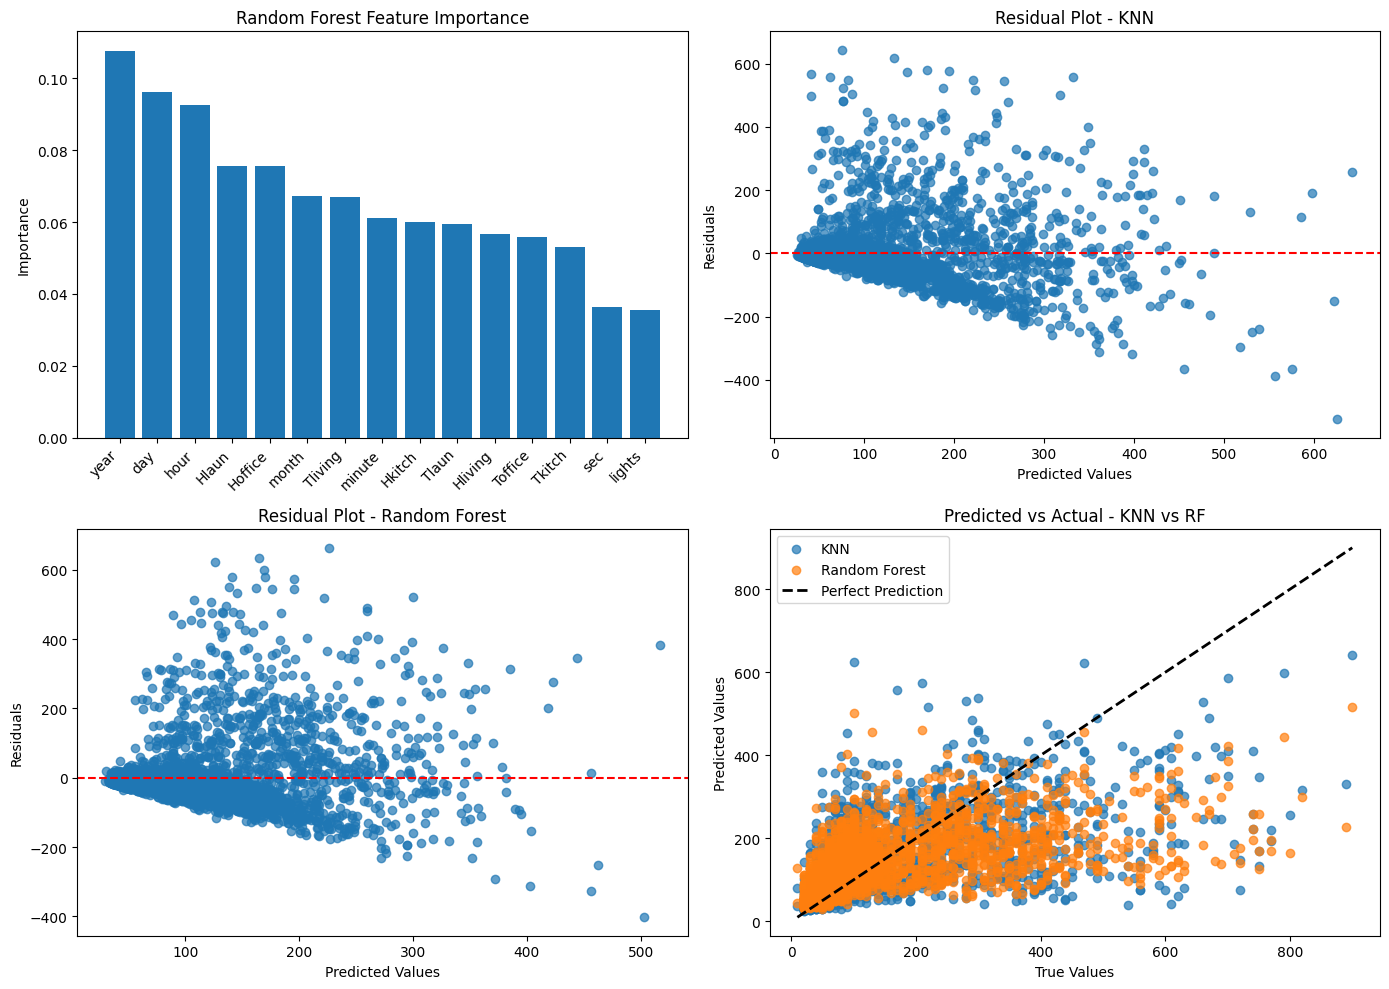

KeyboardInterrupt: 

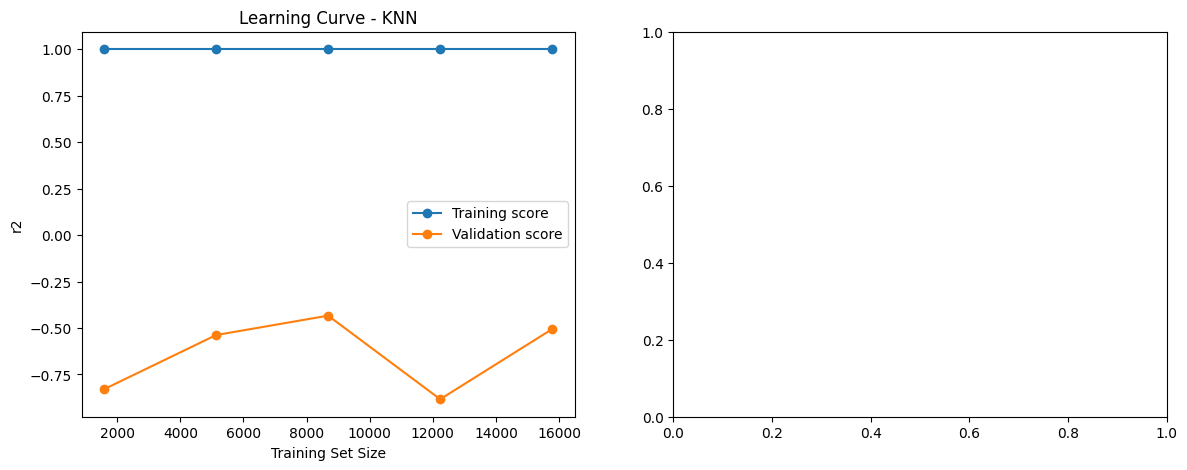

In [24]:
# Train + tune models with GridSearchCV
results = {}
best_models = {}

for model_name, (pipeline, param_grid) in models_param_grid.items():
    print(f"\n🔹 Running GridSearchCV for {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="r2",
        cv=5,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    best_models[model_name] = best_model
    
    results[model_name] = {
        "Best Params": grid_search.best_params_,
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }
    
    print("✅ Best Params:", grid_search.best_params_)
    print("✅ R2 Score:", r2_score(y_test, y_pred))
    print("✅ MSE:", mean_squared_error(y_test, y_pred))
    print("✅ RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("✅ MAE:", mean_absolute_error(y_test, y_pred))


# Compare Results
comparison_df = pd.DataFrame(results).T
print("\n📊 Final Comparison:")
print(comparison_df)


# Regression Diagnostic Dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# (A) Feature Importance (Random Forest only, before PCA)
rf_model = best_models["Random Forest"]["regressor"]  # access inside pipeline
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

axes[0,0].bar(range(len(importances)), importances[indices], align="center")
axes[0,0].set_xticks(range(len(importances)))
axes[0,0].set_xticklabels([feature_names[i] for i in indices], rotation=45, ha="right")
axes[0,0].set_title("Random Forest Feature Importance")
axes[0,0].set_ylabel("Importance")

# (B) Residual Plot - KNN
y_pred_knn = best_models["KNN"].predict(X_test)
residuals_knn = y_test - y_pred_knn
axes[0,1].scatter(y_pred_knn, residuals_knn, alpha=0.7)
axes[0,1].axhline(0, color="red", linestyle="--")
axes[0,1].set_title("Residual Plot - KNN")
axes[0,1].set_xlabel("Predicted Values")
axes[0,1].set_ylabel("Residuals")

# (C) Residual Plot - Random Forest
y_pred_rf = best_models["Random Forest"].predict(X_test)
residuals_rf = y_test - y_pred_rf
axes[1,0].scatter(y_pred_rf, residuals_rf, alpha=0.7)
axes[1,0].axhline(0, color="red", linestyle="--")
axes[1,0].set_title("Residual Plot - Random Forest")
axes[1,0].set_xlabel("Predicted Values")
axes[1,0].set_ylabel("Residuals")

# (D) Predicted vs Actual - Both Models
axes[1,1].scatter(y_test, y_pred_knn, label="KNN", alpha=0.7)
axes[1,1].scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.7)
axes[1,1].plot([y_test.min(), y_test.max()],
               [y_test.min(), y_test.max()],
               'k--', lw=2, label="Perfect Prediction")
axes[1,1].set_title("Predicted vs Actual - KNN vs RF")
axes[1,1].set_xlabel("True Values")
axes[1,1].set_ylabel("Predicted Values")
axes[1,1].legend()

plt.tight_layout()
plt.show()


# Learning Curves
def plot_learning_curve(estimator, title, X, y, ax, cv=5, scoring="r2"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=cv, scoring=scoring,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        random_state=42
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    ax.plot(train_sizes, train_scores_mean, "o-", label="Training score")
    ax.plot(train_sizes, test_scores_mean, "o-", label="Validation score")
    ax.set_title(title)
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel(scoring)
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_learning_curve(best_models["KNN"], "Learning Curve - KNN", X, y, axes[0])
plot_learning_curve(best_models["Random Forest"], "Learning Curve - Random Forest", X, y, axes[1])

plt.tight_layout()
plt.show()

Evaluation metrics:

> R2 score: higher is better (1.0 is perfect)

> MSE: lower is better

GridSearchCV automatically tunes hyperparameters using cross-validation.

Feature Importance

> Only for Random Forest (feature_importances_)

> Helps understand which features influence the prediction most.

Residual Plots

> Shows prediction errors vs predicted values

> Look for randomness around 0 → good fit

> Patterns → model may be missing some structure

Learning curves is an excellent way to see whether your models are underfitting (both train & validation error high) or overfitting (big gap between train & validation).
X-axis → Training set size

>Y-axis → R² score (you could also use "neg_mean_squared_error")

Two curves:

>Training score (blue line)

>Validation score (orange line)

How to read:

>If both curves are low → underfitting (model too simple).

>If training high but validation low → overfitting (model too complex).

>If both converge at high values → good generalization.

If PCA is applied, the features used by the Random Forest are actually the PCA components, not the original features.
In the dashboard, I extracted feature importances from the raw RF (post-PCA) — if PCA reduces to 7 components, RF importance will also be over those components, not the 10 original diabetes features. PCA component loadings (i.e., how each original feature contributes to each PCA axis), so we can interpret Random Forest feature importances properly? Here’s what we’ll add:

📊 PCA Explained Variance → how much variance each component captures.

🧩 PCA Loadings Heatmap → contribution of each original feature to each PCA component.

🌳 Mapped Feature Importance → multiplying PCA loadings × RF importance to approximate how much each original feature influences the model.

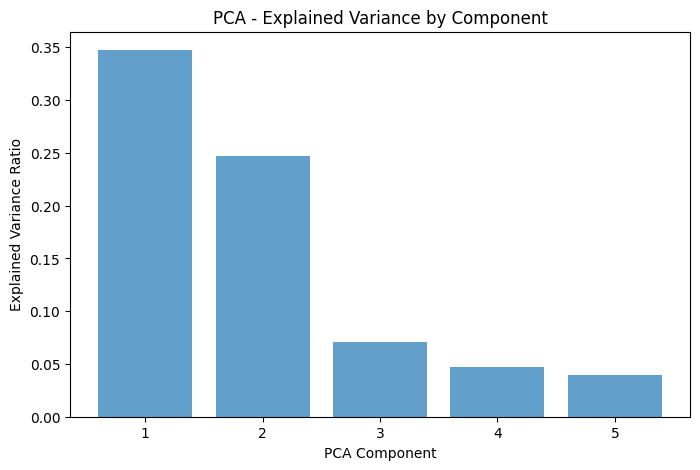

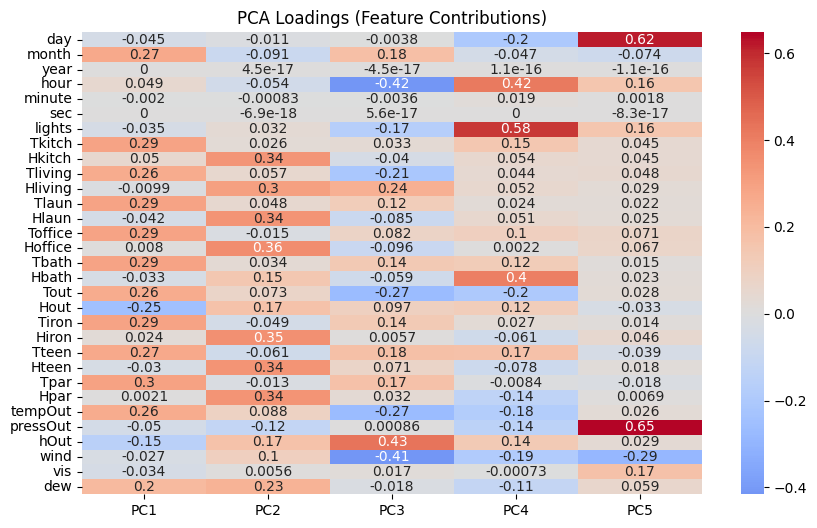

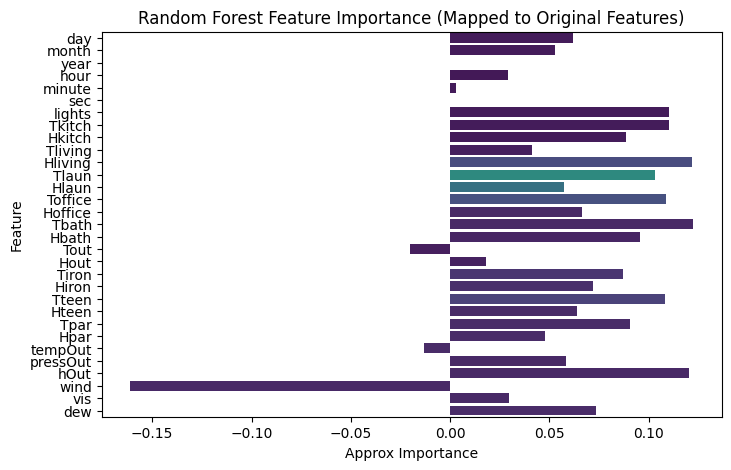


📊 Approximate Feature Importances (after PCA):
     Feature  Approx Importance
15     Tbath       1.224285e-01
10   Hliving       1.218665e-01
27      hOut       1.203300e-01
7     Tkitch       1.102982e-01
6     lights       1.100206e-01
13   Toffice       1.087511e-01
21     Tteen       1.079900e-01
11     Tlaun       1.032253e-01
16     Hbath       9.552764e-02
23      Tpar       9.038755e-02
8     Hkitch       8.832713e-02
19     Tiron       8.680646e-02
30       dew       7.359667e-02
20     Hiron       7.177589e-02
14   Hoffice       6.632956e-02
22     Hteen       6.374349e-02
0        day       6.185822e-02
26  pressOut       5.835447e-02
12     Hlaun       5.723921e-02
1      month       5.293864e-02
24      Hpar       4.758934e-02
9    Tliving       4.108453e-02
29       vis       2.961534e-02
3       hour       2.891125e-02
18      Hout       1.785453e-02
4     minute       2.790540e-03
2       year       1.576721e-18
5        sec      -5.652535e-18
25   tempOut      -1.318

In [6]:
# PCA Analysis (for RF model)
# Extract fitted PCA and RandomForest from pipeline
pca = best_models["Random Forest"]["pca"]
rf_model = best_models["Random Forest"]["regressor"]

# (1) PCA Explained Variance
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA - Explained Variance by Component")
plt.show()

# (2) PCA Loadings Heatmap
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=feature_names
)

plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings (Feature Contributions)")
plt.show()

# (3) Map RF Importances back to Original Features
# Multiply loadings (features x components) by RF feature importances (components)
rf_importance_components = rf_model.feature_importances_
mapped_importance = np.dot(loadings.values, rf_importance_components)

mapped_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Approx Importance": mapped_importance}
).sort_values("Approx Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=mapped_importance_df,
    x="Approx Importance"
    , y="Feature"
    , palette="viridis"
    , hue=y
    , legend=False
)
plt.title("Random Forest Feature Importance (Mapped to Original Features)")
plt.show()

print("\n📊 Approximate Feature Importances (after PCA):")
print(mapped_importance_df)

What this does:

Explained Variance Plot → shows how much each PCA axis contributes.

Loadings Heatmap → shows how each original feature contributes to each PCA component (positive or negative correlation).

Mapped Importance → distributes Random Forest’s importance on PCA axes back to the original features, giving an interpretable importance ranking.

⚠️ Caveat:
The mapping is approximate because Random Forest importances come from PCA features, which are linear combinations of the originals. Still, this method is widely used to recover interpretability after dimensionality reduction.